In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

C:\Programs\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [  0   3   4   5   6   7   9  11  13  15  16  19  20  21  22  23  24  25
  26  28  29  30  32  33  34  35  36  38  41  42  43  44  45  46  47  51
  53  54  56  57  58  59  60  61  62  63  65  66  67  69  70  72  73  74
  77  78  80  81  82  83  84  86  87  88  89  90  91  92  93  94  95  96
  98  99 100 101 102 104 105 106 107 108 109 110 111 112 114 115 117 119
 120 121 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 143 144 146 147 148 149 151 152 153 154 155 158 159 160 161
 163 164 165 166 167 168 169 170 171 173 174 176 177 178 179 180 182 183
 184 185 186 187 188 189 190 191 192 194 195 197 198 199 201 203 205 206
 207 208 209 211 212 213 214 216 217 218 219 220 221 223 224 225 226 227
 228 229 232 233 234 237 238 243 244 245 246 248 249 254 255 256 257 259
 260 262 264 265 269 270 273 274 275 276 277 279 280 281 282 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 300 304 305 306 307 308
 309 310 311 314 316 317 318 320 321 322 323

## XGBoost

In [5]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 0.2,
                      reg_lambda = .5,
                      max_depth=4, 
                      gamma=5,
                      max_delta_step = 3,
                      seed=82)

# add max_delta_step=3  to handle imbalanced class with draws
# max depth was 5. I changed to 4.

In [6]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[18:05:25] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.00000	validation_0-mlogloss:1.09197	validation_1-merror:0.00000	validation_1-mlogloss:1.09212
[1]	validation_0-merror:0.00000	validation_0-mlogloss:1.08460	validation_1-merror:0.00000	validation_1-mlogloss:1.08476
[2]	validation_0-merror:0.00000	validation_0-mlogloss:1.07822	validation_1-merror:0.00000	validation_1-mlogloss:1.07859
[3]	validation_0-merror:0.00000	validation_0-mlogloss:1.07266	validation_1-merror:0.00000	validation_1-mlogloss:1.07333
[4]	validation_0-merror:0.00000	validation_0-mlogloss:1.06611	validation_1-merror:0.00000	validation_1-mlogloss:1.06703
[5]	validation_0-merror:0.00842	validation_

[65]	validation_0-merror:0.00000	validation_0-mlogloss:0.73965	validation_1-merror:0.00000	validation_1-mlogloss:0.74421
[66]	validation_0-merror:0.00000	validation_0-mlogloss:0.73520	validation_1-merror:0.00000	validation_1-mlogloss:0.73973
[67]	validation_0-merror:0.00000	validation_0-mlogloss:0.73077	validation_1-merror:0.00000	validation_1-mlogloss:0.73528
[68]	validation_0-merror:0.00000	validation_0-mlogloss:0.72691	validation_1-merror:0.00000	validation_1-mlogloss:0.73150
[69]	validation_0-merror:0.00000	validation_0-mlogloss:0.72300	validation_1-merror:0.00000	validation_1-mlogloss:0.72768
[70]	validation_0-merror:0.00000	validation_0-mlogloss:0.71940	validation_1-merror:0.00000	validation_1-mlogloss:0.72411
[71]	validation_0-merror:0.00000	validation_0-mlogloss:0.71508	validation_1-merror:0.00000	validation_1-mlogloss:0.71978
[72]	validation_0-merror:0.00000	validation_0-mlogloss:0.71135	validation_1-merror:0.00000	validation_1-mlogloss:0.71612
[73]	validation_0-merror:0.00000

[133]	validation_0-merror:0.00000	validation_0-mlogloss:0.51389	validation_1-merror:0.00000	validation_1-mlogloss:0.51992
[134]	validation_0-merror:0.00000	validation_0-mlogloss:0.51099	validation_1-merror:0.00000	validation_1-mlogloss:0.51699
[135]	validation_0-merror:0.00000	validation_0-mlogloss:0.50847	validation_1-merror:0.00000	validation_1-mlogloss:0.51458
[136]	validation_0-merror:0.00000	validation_0-mlogloss:0.50599	validation_1-merror:0.00000	validation_1-mlogloss:0.51214
[137]	validation_0-merror:0.00000	validation_0-mlogloss:0.50394	validation_1-merror:0.00000	validation_1-mlogloss:0.51016
[138]	validation_0-merror:0.00000	validation_0-mlogloss:0.50188	validation_1-merror:0.00000	validation_1-mlogloss:0.50821
[139]	validation_0-merror:0.00000	validation_0-mlogloss:0.49944	validation_1-merror:0.00000	validation_1-mlogloss:0.50581
[140]	validation_0-merror:0.00000	validation_0-mlogloss:0.49663	validation_1-merror:0.00000	validation_1-mlogloss:0.50297
[141]	validation_0-merro

[201]	validation_0-merror:0.00000	validation_0-mlogloss:0.36368	validation_1-merror:0.00000	validation_1-mlogloss:0.36979
[202]	validation_0-merror:0.00000	validation_0-mlogloss:0.36171	validation_1-merror:0.00000	validation_1-mlogloss:0.36779
[203]	validation_0-merror:0.00000	validation_0-mlogloss:0.36005	validation_1-merror:0.00000	validation_1-mlogloss:0.36616
[204]	validation_0-merror:0.00000	validation_0-mlogloss:0.35811	validation_1-merror:0.00000	validation_1-mlogloss:0.36418
[205]	validation_0-merror:0.00000	validation_0-mlogloss:0.35646	validation_1-merror:0.00000	validation_1-mlogloss:0.36255
[206]	validation_0-merror:0.00000	validation_0-mlogloss:0.35453	validation_1-merror:0.00000	validation_1-mlogloss:0.36060
[207]	validation_0-merror:0.00000	validation_0-mlogloss:0.35291	validation_1-merror:0.00000	validation_1-mlogloss:0.35899
[208]	validation_0-merror:0.00000	validation_0-mlogloss:0.35132	validation_1-merror:0.00000	validation_1-mlogloss:0.35741
[209]	validation_0-merro

[269]	validation_0-merror:0.00000	validation_0-mlogloss:0.26265	validation_1-merror:0.00000	validation_1-mlogloss:0.26817
[270]	validation_0-merror:0.00000	validation_0-mlogloss:0.26127	validation_1-merror:0.00000	validation_1-mlogloss:0.26676
[271]	validation_0-merror:0.00000	validation_0-mlogloss:0.26012	validation_1-merror:0.00000	validation_1-mlogloss:0.26562
[272]	validation_0-merror:0.00000	validation_0-mlogloss:0.25905	validation_1-merror:0.00000	validation_1-mlogloss:0.26453
[273]	validation_0-merror:0.00000	validation_0-mlogloss:0.25769	validation_1-merror:0.00000	validation_1-mlogloss:0.26314
[274]	validation_0-merror:0.00000	validation_0-mlogloss:0.25662	validation_1-merror:0.00000	validation_1-mlogloss:0.26208
[275]	validation_0-merror:0.00000	validation_0-mlogloss:0.25547	validation_1-merror:0.00000	validation_1-mlogloss:0.26093
[276]	validation_0-merror:0.00000	validation_0-mlogloss:0.25434	validation_1-merror:0.00000	validation_1-mlogloss:0.25982
[277]	validation_0-merro

[337]	validation_0-merror:0.00000	validation_0-mlogloss:0.19432	validation_1-merror:0.00000	validation_1-mlogloss:0.19929
[338]	validation_0-merror:0.00000	validation_0-mlogloss:0.19350	validation_1-merror:0.00000	validation_1-mlogloss:0.19847
[339]	validation_0-merror:0.00000	validation_0-mlogloss:0.19272	validation_1-merror:0.00000	validation_1-mlogloss:0.19767
[340]	validation_0-merror:0.00000	validation_0-mlogloss:0.19173	validation_1-merror:0.00000	validation_1-mlogloss:0.19666
[341]	validation_0-merror:0.00000	validation_0-mlogloss:0.19096	validation_1-merror:0.00000	validation_1-mlogloss:0.19588
[342]	validation_0-merror:0.00000	validation_0-mlogloss:0.19020	validation_1-merror:0.00000	validation_1-mlogloss:0.19510
[343]	validation_0-merror:0.00000	validation_0-mlogloss:0.18966	validation_1-merror:0.00000	validation_1-mlogloss:0.19453
[344]	validation_0-merror:0.00000	validation_0-mlogloss:0.18889	validation_1-merror:0.00000	validation_1-mlogloss:0.19375
[345]	validation_0-merro

[405]	validation_0-merror:0.00000	validation_0-mlogloss:0.14423	validation_1-merror:0.00000	validation_1-mlogloss:0.14842
[406]	validation_0-merror:0.00000	validation_0-mlogloss:0.14368	validation_1-merror:0.00000	validation_1-mlogloss:0.14785
[407]	validation_0-merror:0.00000	validation_0-mlogloss:0.14296	validation_1-merror:0.00000	validation_1-mlogloss:0.14711
[408]	validation_0-merror:0.00000	validation_0-mlogloss:0.14224	validation_1-merror:0.00000	validation_1-mlogloss:0.14637
[409]	validation_0-merror:0.00000	validation_0-mlogloss:0.14182	validation_1-merror:0.00000	validation_1-mlogloss:0.14597
[410]	validation_0-merror:0.00000	validation_0-mlogloss:0.14127	validation_1-merror:0.00000	validation_1-mlogloss:0.14541
[411]	validation_0-merror:0.00000	validation_0-mlogloss:0.14085	validation_1-merror:0.00000	validation_1-mlogloss:0.14500
[412]	validation_0-merror:0.00000	validation_0-mlogloss:0.14014	validation_1-merror:0.00000	validation_1-mlogloss:0.14427
[413]	validation_0-merro

[473]	validation_0-merror:0.00000	validation_0-mlogloss:0.10837	validation_1-merror:0.00000	validation_1-mlogloss:0.11194
[474]	validation_0-merror:0.00000	validation_0-mlogloss:0.10797	validation_1-merror:0.00000	validation_1-mlogloss:0.11152
[475]	validation_0-merror:0.00000	validation_0-mlogloss:0.10766	validation_1-merror:0.00000	validation_1-mlogloss:0.11124
[476]	validation_0-merror:0.00000	validation_0-mlogloss:0.10723	validation_1-merror:0.00000	validation_1-mlogloss:0.11080
[477]	validation_0-merror:0.00000	validation_0-mlogloss:0.10682	validation_1-merror:0.00000	validation_1-mlogloss:0.11038
[478]	validation_0-merror:0.00000	validation_0-mlogloss:0.10629	validation_1-merror:0.00000	validation_1-mlogloss:0.10983
[479]	validation_0-merror:0.00000	validation_0-mlogloss:0.10576	validation_1-merror:0.00000	validation_1-mlogloss:0.10929
[480]	validation_0-merror:0.00000	validation_0-mlogloss:0.10534	validation_1-merror:0.00000	validation_1-mlogloss:0.10886
[481]	validation_0-merro

[541]	validation_0-merror:0.00000	validation_0-mlogloss:0.08324	validation_1-merror:0.00000	validation_1-mlogloss:0.08634
[542]	validation_0-merror:0.00000	validation_0-mlogloss:0.08297	validation_1-merror:0.00000	validation_1-mlogloss:0.08607
[543]	validation_0-merror:0.00000	validation_0-mlogloss:0.08265	validation_1-merror:0.00000	validation_1-mlogloss:0.08574
[544]	validation_0-merror:0.00000	validation_0-mlogloss:0.08232	validation_1-merror:0.00000	validation_1-mlogloss:0.08542
[545]	validation_0-merror:0.00000	validation_0-mlogloss:0.08206	validation_1-merror:0.00000	validation_1-mlogloss:0.08515
[546]	validation_0-merror:0.00000	validation_0-mlogloss:0.08187	validation_1-merror:0.00000	validation_1-mlogloss:0.08496
[547]	validation_0-merror:0.00000	validation_0-mlogloss:0.08161	validation_1-merror:0.00000	validation_1-mlogloss:0.08469
[548]	validation_0-merror:0.00000	validation_0-mlogloss:0.08129	validation_1-merror:0.00000	validation_1-mlogloss:0.08437
[549]	validation_0-merro

[609]	validation_0-merror:0.00000	validation_0-mlogloss:0.06446	validation_1-merror:0.00000	validation_1-mlogloss:0.06710
[610]	validation_0-merror:0.00000	validation_0-mlogloss:0.06432	validation_1-merror:0.00000	validation_1-mlogloss:0.06697
[611]	validation_0-merror:0.00000	validation_0-mlogloss:0.06408	validation_1-merror:0.00000	validation_1-mlogloss:0.06672
[612]	validation_0-merror:0.00000	validation_0-mlogloss:0.06383	validation_1-merror:0.00000	validation_1-mlogloss:0.06648
[613]	validation_0-merror:0.00000	validation_0-mlogloss:0.06359	validation_1-merror:0.00000	validation_1-mlogloss:0.06623
[614]	validation_0-merror:0.00000	validation_0-mlogloss:0.06349	validation_1-merror:0.00000	validation_1-mlogloss:0.06613
[615]	validation_0-merror:0.00000	validation_0-mlogloss:0.06325	validation_1-merror:0.00000	validation_1-mlogloss:0.06589
[616]	validation_0-merror:0.00000	validation_0-mlogloss:0.06312	validation_1-merror:0.00000	validation_1-mlogloss:0.06576
[617]	validation_0-merro

[677]	validation_0-merror:0.00000	validation_0-mlogloss:0.05233	validation_1-merror:0.00000	validation_1-mlogloss:0.05496
[678]	validation_0-merror:0.00000	validation_0-mlogloss:0.05214	validation_1-merror:0.00000	validation_1-mlogloss:0.05477
[679]	validation_0-merror:0.00000	validation_0-mlogloss:0.05194	validation_1-merror:0.00000	validation_1-mlogloss:0.05457
[680]	validation_0-merror:0.00000	validation_0-mlogloss:0.05176	validation_1-merror:0.00000	validation_1-mlogloss:0.05438
[681]	validation_0-merror:0.00000	validation_0-mlogloss:0.05166	validation_1-merror:0.00000	validation_1-mlogloss:0.05429
[682]	validation_0-merror:0.00000	validation_0-mlogloss:0.05155	validation_1-merror:0.00000	validation_1-mlogloss:0.05419
[683]	validation_0-merror:0.00000	validation_0-mlogloss:0.05136	validation_1-merror:0.00000	validation_1-mlogloss:0.05400
[684]	validation_0-merror:0.00000	validation_0-mlogloss:0.05118	validation_1-merror:0.00000	validation_1-mlogloss:0.05381
[685]	validation_0-merro

[745]	validation_0-merror:0.00000	validation_0-mlogloss:0.04255	validation_1-merror:0.00000	validation_1-mlogloss:0.04511
[746]	validation_0-merror:0.00000	validation_0-mlogloss:0.04240	validation_1-merror:0.00000	validation_1-mlogloss:0.04496
[747]	validation_0-merror:0.00000	validation_0-mlogloss:0.04226	validation_1-merror:0.00000	validation_1-mlogloss:0.04481
[748]	validation_0-merror:0.00000	validation_0-mlogloss:0.04218	validation_1-merror:0.00000	validation_1-mlogloss:0.04473
[749]	validation_0-merror:0.00000	validation_0-mlogloss:0.04203	validation_1-merror:0.00000	validation_1-mlogloss:0.04458
[750]	validation_0-merror:0.00000	validation_0-mlogloss:0.04189	validation_1-merror:0.00000	validation_1-mlogloss:0.04444
[751]	validation_0-merror:0.00000	validation_0-mlogloss:0.04174	validation_1-merror:0.00000	validation_1-mlogloss:0.04429
[752]	validation_0-merror:0.00000	validation_0-mlogloss:0.04166	validation_1-merror:0.00000	validation_1-mlogloss:0.04421
[753]	validation_0-merro

[813]	validation_0-merror:0.00000	validation_0-mlogloss:0.03546	validation_1-merror:0.00000	validation_1-mlogloss:0.03793
[814]	validation_0-merror:0.00000	validation_0-mlogloss:0.03534	validation_1-merror:0.00000	validation_1-mlogloss:0.03781
[815]	validation_0-merror:0.00000	validation_0-mlogloss:0.03523	validation_1-merror:0.00000	validation_1-mlogloss:0.03769
[816]	validation_0-merror:0.00000	validation_0-mlogloss:0.03516	validation_1-merror:0.00000	validation_1-mlogloss:0.03762
[817]	validation_0-merror:0.00000	validation_0-mlogloss:0.03510	validation_1-merror:0.00000	validation_1-mlogloss:0.03756
[818]	validation_0-merror:0.00000	validation_0-mlogloss:0.03504	validation_1-merror:0.00000	validation_1-mlogloss:0.03750
[819]	validation_0-merror:0.00000	validation_0-mlogloss:0.03493	validation_1-merror:0.00000	validation_1-mlogloss:0.03738
[820]	validation_0-merror:0.00000	validation_0-mlogloss:0.03481	validation_1-merror:0.00000	validation_1-mlogloss:0.03726
[821]	validation_0-merro

[881]	validation_0-merror:0.00000	validation_0-mlogloss:0.03194	validation_1-merror:0.00000	validation_1-mlogloss:0.03443
[882]	validation_0-merror:0.00000	validation_0-mlogloss:0.03194	validation_1-merror:0.00000	validation_1-mlogloss:0.03443
[883]	validation_0-merror:0.00000	validation_0-mlogloss:0.03188	validation_1-merror:0.00000	validation_1-mlogloss:0.03438
[884]	validation_0-merror:0.00000	validation_0-mlogloss:0.03188	validation_1-merror:0.00000	validation_1-mlogloss:0.03438
[885]	validation_0-merror:0.00000	validation_0-mlogloss:0.03182	validation_1-merror:0.00000	validation_1-mlogloss:0.03432
[886]	validation_0-merror:0.00000	validation_0-mlogloss:0.03182	validation_1-merror:0.00000	validation_1-mlogloss:0.03432
[887]	validation_0-merror:0.00000	validation_0-mlogloss:0.03182	validation_1-merror:0.00000	validation_1-mlogloss:0.03432
[888]	validation_0-merror:0.00000	validation_0-mlogloss:0.03181	validation_1-merror:0.00000	validation_1-mlogloss:0.03431
[889]	validation_0-merro

[949]	validation_0-merror:0.00000	validation_0-mlogloss:0.03135	validation_1-merror:0.00000	validation_1-mlogloss:0.03398
[950]	validation_0-merror:0.00000	validation_0-mlogloss:0.03134	validation_1-merror:0.00000	validation_1-mlogloss:0.03398
[951]	validation_0-merror:0.00000	validation_0-mlogloss:0.03134	validation_1-merror:0.00000	validation_1-mlogloss:0.03398
[952]	validation_0-merror:0.00000	validation_0-mlogloss:0.03134	validation_1-merror:0.00000	validation_1-mlogloss:0.03398
[953]	validation_0-merror:0.00000	validation_0-mlogloss:0.03134	validation_1-merror:0.00000	validation_1-mlogloss:0.03398
[954]	validation_0-merror:0.00000	validation_0-mlogloss:0.03128	validation_1-merror:0.00000	validation_1-mlogloss:0.03392
[955]	validation_0-merror:0.00000	validation_0-mlogloss:0.03128	validation_1-merror:0.00000	validation_1-mlogloss:0.03392
[956]	validation_0-merror:0.00000	validation_0-mlogloss:0.03128	validation_1-merror:0.00000	validation_1-mlogloss:0.03392
[957]	validation_0-merro

In [7]:
y_pred.shape

(198,)

In [8]:
pd.Series(y_pred).value_counts()

3.0    92
1.0    86
2.0    20
dtype: int64

## LogisticRegression

In [9]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [10]:
pd.Series(LR_y_pred).value_counts()

3.0    107
1.0     91
dtype: int64

## Comparison

In [11]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 100.00%
XGB Accuracy: 100.00%
LR train Accuracy: 90.24%
LR Accuracy: 86.87%


In [12]:
features_names = list(X_with_columns.columns)

In [13]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: ATGDIFF                             19.99%
Feature Importance: HTGDIFF                             19.73%
Feature Importance: awayTeamScore.minutesInFront        18.16%
Feature Importance: homeTeamScore.minutesInFront        14.67%
Feature Importance: AVGHTGDIFF                          5.74%
Feature Importance: awayTeamScoreChart.goals            5.72%
Feature Importance: homeTeamScoreChart.goals            5.48%
Feature Importance: awayTeamScore.matchScore.totalScore 5.35%
Feature Importance: homeTeamScore.matchScore.totalScore 5.15%
Feature Importance: round.year                          0.0%


In [14]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['homeTeamScore.matchScore.totalScore', 'round.year']

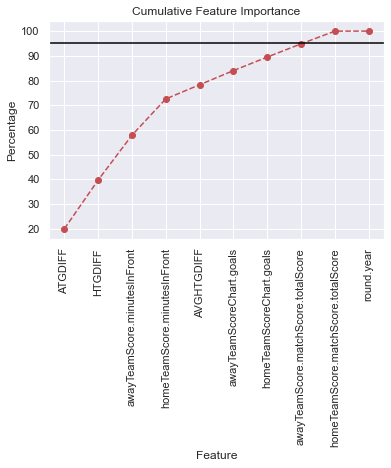

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

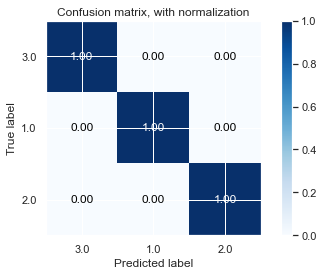

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 100.00%


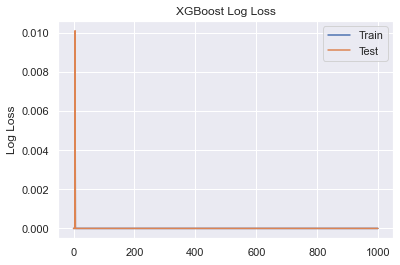

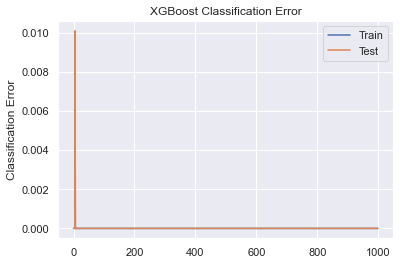

In [19]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [20]:
z_pred = XGB_model.predict(Z)

In [21]:
xgb_df_next_games = df_next_games.copy()

In [22]:
xgb_df_next_games['predicted_result'] = z_pred

In [23]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
9,Western Bulldogs,Carlton,1.0
10,Sydney Swans,Geelong Cats,1.0
11,Collingwood,Adelaide Crows,1.0
12,Essendon,Brisbane Lions,1.0
13,Port Adelaide,Hawthorn,1.0
14,Gold Coast Suns,Melbourne,1.0
15,North Melbourne,West Coast Eagles,3.0
16,Richmond,GWS Giants,3.0
17,Fremantle,St Kilda,3.0


In [24]:
 z_pred_prob = XGB_model.predict_proba(Z)

In [25]:
xgb_df_next_games['prob_loss'] = z_pred_prob[:,0]
xgb_df_next_games['prob_draw'] = z_pred_prob[:,1]
xgb_df_next_games['prob_win'] = z_pred_prob[:,2]

In [26]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win
9,Western Bulldogs,Carlton,1.0,0.967903,0.015052,0.017045
10,Sydney Swans,Geelong Cats,1.0,0.771615,0.166250,0.062135
11,Collingwood,Adelaide Crows,1.0,0.658358,0.053144,0.288498
12,Essendon,Brisbane Lions,1.0,0.967903,0.015052,0.017045
13,Port Adelaide,Hawthorn,1.0,0.702447,0.049776,0.247777
14,Gold Coast Suns,Melbourne,1.0,0.967903,0.015052,0.017045
15,North Melbourne,West Coast Eagles,3.0,0.017295,0.014801,0.967904
16,Richmond,GWS Giants,3.0,0.017295,0.014801,0.967904
17,Fremantle,St Kilda,3.0,0.017295,0.014801,0.967904
